## a. Import Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## b. Load Datasets

In [2]:
train = pd.read_csv('application_train.csv')

In [3]:
train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [4]:
train.shape

(307511, 122)

In [5]:
train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
train.duplicated().sum()

0

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
# Cek Missing Values
cek_null = train.isna().sum().sort_values(ascending=False)
percentage = ((train.isnull().sum()/len(train)*100)).sort_values(ascending=False)
isna_train = pd.concat([cek_null, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values:')
isna_train.head(20)

Count and percentage of missing values:


Count  Percentage
COMMONAREA_MEDI           214865   69.872297
COMMONAREA_AVG            214865   69.872297
COMMONAREA_MODE           214865   69.872297
NONLIVINGAPARTMENTS_MODE  213514   69.432963
NONLIVINGAPARTMENTS_MEDI  213514   69.432963
NONLIVINGAPARTMENTS_AVG   213514   69.432963
FONDKAPREMONT_MODE        210295   68.386172
LIVINGAPARTMENTS_MEDI     210199   68.354953
LIVINGAPARTMENTS_MODE     210199   68.354953
LIVINGAPARTMENTS_AVG      210199   68.354953
FLOORSMIN_MEDI            208642   67.848630
FLOORSMIN_MODE            208642   67.848630
FLOORSMIN_AVG             208642   67.848630
YEARS_BUILD_MEDI          204488   66.497784
YEARS_BUILD_AVG           204488   66.497784
YEARS_BUILD_MODE          204488   66.497784
OWN_CAR_AGE               202929   65.990810
LANDAREA_MODE             182590   59.376738
LANDAREA_AVG              182590   59.376738
LANDAREA_MEDI             182590   59.376738

In [8]:
import dtale
dtale.show(train)

2021-06-12 15:27:24,527 - INFO     - NumExpr defaulting to 4 threads.


In [9]:
from pandas_profiling import ProfileReport

In [10]:
profile = ProfileReport(train,minimal=True)
profile.to_file(output_file="Home Credit Train.html")

In [12]:
profile

# EDA

Text(0.5, 1.0, 'Distribution of Target')

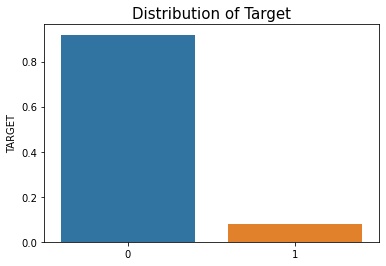

In [14]:
# Distribution of Target
sns.barplot(x=[0,1], y=train['TARGET'].value_counts(normalize=True))
plt.title('Distribution of Target', fontsize=15)

Text(0.5, 1.0, 'Distribution of Clients Age')

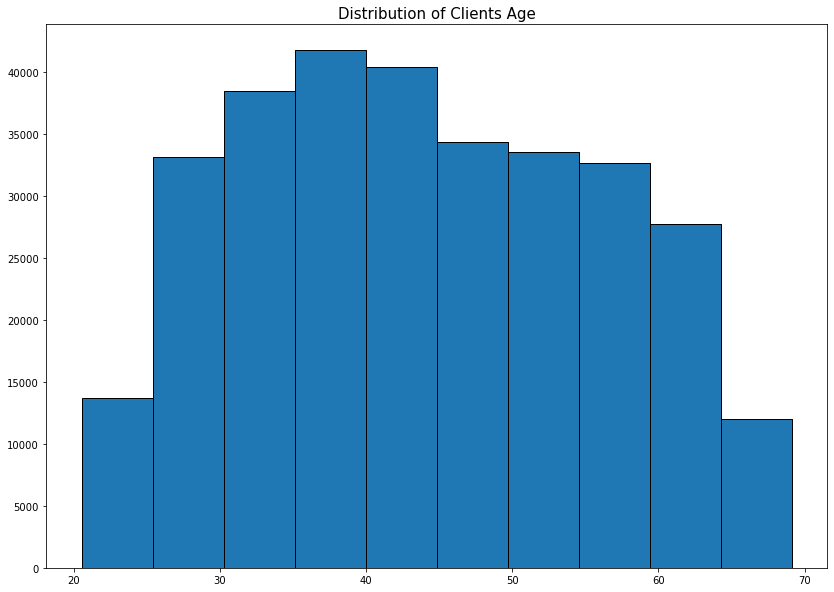

In [15]:
# Distribution of Clients Age
fig = plt.figure(figsize=(14,10))
plt.hist(train['DAYS_BIRTH']/-365, edgecolor = 'black')
plt.title('Distribution of Clients Age', fontsize=15)

Text(0.5, 1.0, 'Distribution of AMT_CREDIT')

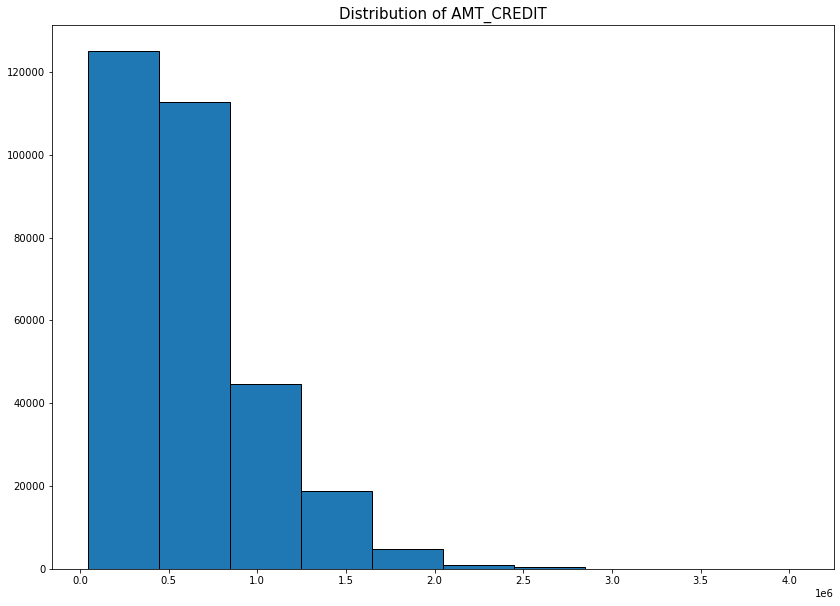

In [16]:
# AMT_Credit distribution
fig = plt.figure(figsize=(14,10))
plt.hist(train['AMT_CREDIT'], edgecolor = 'black')
plt.title('Distribution of AMT_CREDIT', fontsize=15)

/Users/joicemargaretha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



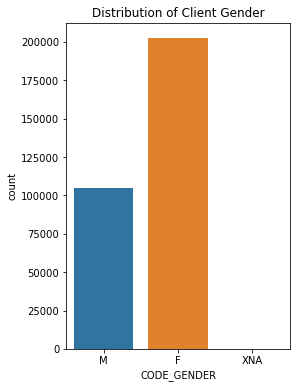

In [17]:
fig = plt.figure(figsize=(4,6))
sns.countplot(train['CODE_GENDER']).set_title('Distribution of Client Gender')
plt.show()
#The number of female clients is almost double the number of male clients. 

Text(0.5, 1.0, 'Distribution of Loan Type')

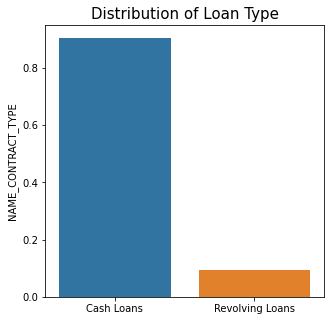

In [18]:
fig = plt.figure(figsize=(5,5))
sns.barplot(x=['Cash Loans','Revolving Loans'], y=train['NAME_CONTRACT_TYPE'].value_counts(normalize=True))
plt.title('Distribution of Loan Type', fontsize=15)

/Users/joicemargaretha/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of AMT_CREDIT')

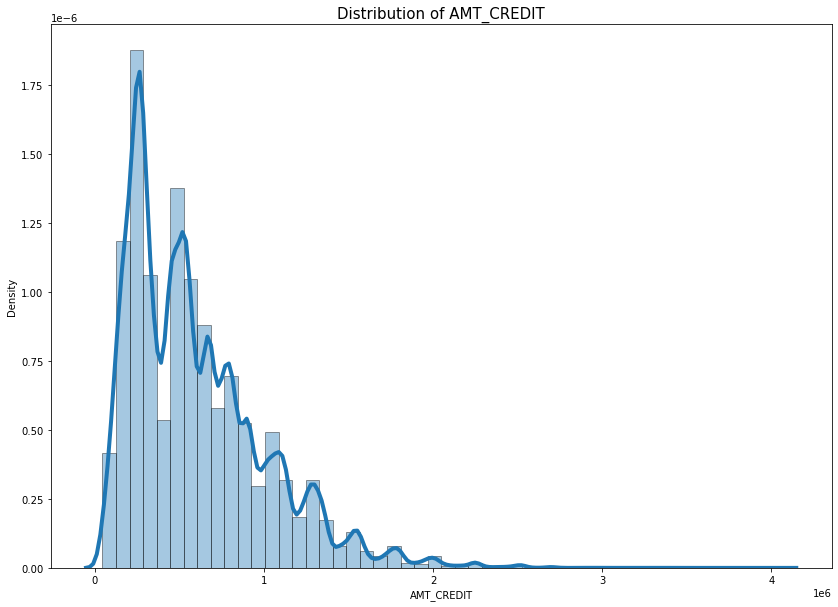

In [19]:
fig = plt.figure(figsize=(14,10))
sns.distplot(train['AMT_CREDIT'], hist=True, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Distribution of AMT_CREDIT', fontsize=15)

In [20]:
count_unemployed = train.loc[(train['TARGET'] == 1) & (train['DAYS_EMPLOYED'] <= 0)].count()['SK_ID_CURR']
count_employed = train.loc[(train['TARGET'] == 1) & (train['DAYS_EMPLOYED'] > 0)].count()['SK_ID_CURR']
total_all = train.loc[(train['TARGET'] == 1)].count()['SK_ID_CURR']
data_pie = {
    "Type":['Unemployed', 'Employed'],
    "Percentage":[round(count_unemployed/total_all*100),round(count_employed/total_all*100)],
    "Count":[count_unemployed, count_employed]
}
df_pie = pd.DataFrame(data_pie,
                     index=['Employed', 'Unemployed'])

In [21]:
data_pie

{'Type': ['Unemployed', 'Employed'],
 'Percentage': [88, 12],
 'Count': [21835, 2990]}

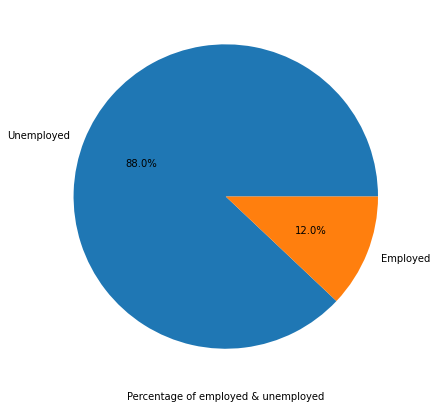

In [22]:
# Creating plot
employe_type = ['Unemployed', 'Employed']
data = [21835, 2990]
my_colors = ['lightblue','silver']
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = employe_type, autopct='%1.1f%%')
  
# show plot
plt.xlabel('Percentage of employed & unemployed')
plt.show()

# **Pre-processing**

# **Change days to absolute no.**

In [23]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].abs()
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].abs()
train['DAYS_REGISTRATION'] = train['DAYS_REGISTRATION'].abs()
train['DAYS_ID_PUBLISH'] = train['DAYS_ID_PUBLISH'].abs()
train['DAYS_LAST_PHONE_CHANGE'] = train['DAYS_LAST_PHONE_CHANGE'].abs()

train_msmr_60 : missing values lebih dari 60%
train_msls_60 : missing values kurang dari 60%

# **Columns with >60% missing values**

In [24]:
# contain null values >60%
train_msmr_60 = ['OWN_CAR_AGE','YEARS_BUILD_AVG','COMMONAREA_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG',
                 'NONLIVINGAPARTMENTS_AVG','YEARS_BUILD_MODE','COMMONAREA_MODE','FLOORSMIN_MODE','LIVINGAPARTMENTS_MODE',
                 'NONLIVINGAPARTMENTS_MODE','YEARS_BUILD_MEDI','COMMONAREA_MEDI','FLOORSMIN_MEDI','LIVINGAPARTMENTS_MEDI',
                 'NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE']

In [25]:
train = train.drop(train_msmr_60,1)

In [26]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)

In [27]:
train.shape

(307511, 105)

In [28]:
train_msls_60 = ['OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 
                 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 
                 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 
                 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE',
                 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 
                 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
                 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                 'AMT_REQ_CREDIT_BUREAU_YEAR','NAME_TYPE_SUITE','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2']

## **After drop null columns above 60**

In [29]:
train_miss = pd.DataFrame(train,columns=train_msls_60)

In [30]:
train_miss.head()

OCCUPATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_3  APARTMENTS_AVG  \
0        Laborers      0.083037      0.139376          0.0247   
1      Core staff      0.311267           NaN          0.0959   
2        Laborers           NaN      0.729567             NaN   
3        Laborers           NaN           NaN             NaN   
4      Core staff           NaN           NaN             NaN   

   BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  ELEVATORS_AVG  \
0            0.0369                       0.9722           0.00   
1            0.0529                       0.9851           0.08   
2               NaN                          NaN            NaN   
3               NaN                          NaN            NaN   
4               NaN                          NaN            NaN   

   ENTRANCES_AVG  FLOORSMAX_AVG  LANDAREA_AVG  ...  EMERGENCYSTATE_MODE  \
0         0.0690         0.0833        0.0369  ...                   No   
1         0.0345         0.2917        0.0130  ...                   No   
2            NaN            NaN           NaN  ...                  NaN   
3            NaN            NaN           NaN  ...                  NaN   
4            NaN            NaN           NaN  ...                  NaN   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  NAME_TYPE_SUITE  \
0                        0.0                         1.0    Unaccompanied   
1                        0.0                         0.0           Family   
2                        0.0                         0.0    Unaccompanied   
3                        NaN                         NaN    Unaccompanied   
4                        0.0                         0.0    Unaccompanied   

   DAYS_LAST_PHONE_CHANGE  EXT_SOURCE_2  
0                  1134.0      0.262949  
1                   828.0      0.622246  
2                   815.0      0.555912  
3                   617.0      0.650442  
4                  1106.0      0.322738  

[5 rows x 43 columns]

In [31]:
pd.options.display.float_format = '{:.2f}'.format
train_miss.describe()

EXT_SOURCE_1  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
count     134133.00     246546.00       151450.00         127568.00   
mean           0.50          0.51            0.12              0.09   
std            0.21          0.19            0.11              0.08   
min            0.01          0.00            0.00              0.00   
25%            0.33          0.37            0.06              0.04   
50%            0.51          0.54            0.09              0.08   
75%            0.68          0.67            0.15              0.11   
max            0.96          0.90            1.00              1.00   

       YEARS_BEGINEXPLUATATION_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
count                    157504.00      143620.00      152683.00   
mean                          0.98           0.08           0.15   
std                           0.06           0.13           0.10   
min                           0.00           0.00           0.00   
25%                           0.98           0.00           0.07   
50%                           0.98           0.00           0.14   
75%                           0.99           0.12           0.21   
max                           1.00           1.00           1.00   

       FLOORSMAX_AVG  LANDAREA_AVG  LIVINGAREA_AVG  ...  NONLIVINGAREA_MEDI  \
count      154491.00     124921.00       153161.00  ...           137829.00   
mean            0.23          0.07            0.11  ...                0.03   
std             0.14          0.08            0.11  ...                0.07   
min             0.00          0.00            0.00  ...                0.00   
25%             0.17          0.02            0.05  ...                0.00   
50%             0.17          0.05            0.07  ...                0.00   
75%             0.33          0.09            0.13  ...                0.03   
max             1.00          1.00            1.00  ...                1.00   

       TOTALAREA_MODE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count       159080.00                   265992.00                  265992.00   
mean             0.10                        0.01                       0.01   
std              0.11                        0.08                       0.11   
min              0.00                        0.00                       0.00   
25%              0.04                        0.00                       0.00   
50%              0.07                        0.00                       0.00   
75%              0.13                        0.00                       0.00   
max              1.00                        4.00                       9.00   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                   265992.00                  265992.00   
mean                         0.03                       0.27   
std                          0.20                       0.92   
min                          0.00                       0.00   
25%                          0.00                       0.00   
50%                          0.00                       0.00   
75%                          0.00                       0.00   
max                          8.00                      27.00   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
count                  265992.00                   265992.00   
mean                        0.27                        1.90   
std                         0.79                        1.87   
min                         0.00                        0.00   
25%                         0.00                        0.00   
50%                         0.00                        1.00   
75%                         0.00                        3.00   
max                       261.00                       25.00   

       DAYS_LAST_PHONE_CHANGE  EXT_SOURCE_2  
count               307510.00     306851.00  
mean                   962.86          0.51  
std                    826.81

In [32]:
# After drop null columns (above 60%)
train_miss.shape

(307511, 43)

In [33]:
train_miss.select_dtypes('number').columns

Index(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_2'],
      dtype='object')

`EXT_SOURCE_1`, `EXT_SOURCE_3`, `DAYS_LAST_PHONE_CHANGE`, `EXT_SOURCE_2` are normally distributed, so we will imput `mean` to the missing values. And we will imput the `median` to the leftover features with data type `number`.

In [34]:
train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

# **Handling Missing Values**

In [35]:
train_miss.select_dtypes('number').skew().abs()<1

EXT_SOURCE_1                     True
EXT_SOURCE_3                     True
APARTMENTS_AVG                  False
BASEMENTAREA_AVG                False
YEARS_BEGINEXPLUATATION_AVG     False
ELEVATORS_AVG                   False
ENTRANCES_AVG                   False
FLOORSMAX_AVG                   False
LANDAREA_AVG                    False
LIVINGAREA_AVG                  False
NONLIVINGAREA_AVG               False
APARTMENTS_MODE                 False
BASEMENTAREA_MODE               False
YEARS_BEGINEXPLUATATION_MODE    False
ELEVATORS_MODE                  False
ENTRANCES_MODE                  False
FLOORSMAX_MODE                  False
LANDAREA_MODE                   False
LIVINGAREA_MODE                 False
NONLIVINGAREA_MODE              False
APARTMENTS_MEDI                 False
BASEMENTAREA_MEDI               False
YEARS_BEGINEXPLUATATION_MEDI    False
ELEVATORS_MEDI                  False
ENTRANCES_MEDI                  False
FLOORSMAX_MEDI                  False
LANDAREA_MED

In [36]:
train_miss_mean = ['EXT_SOURCE_1','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2']

In [37]:
# handling missing values with mean
for col in train_miss_mean:
    train[col].fillna(train[col].mean(),inplace=True)

In [38]:
train_miss_med = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']

In [39]:
# handling missing values with median
for col in train_miss_med:
    train[col].fillna(train[col].median(),inplace=True)

In [40]:
train_miss.select_dtypes('object').columns

Index(['OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_TYPE_SUITE'],
      dtype='object')

In [41]:
train_miss_mode = ['OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_TYPE_SUITE']

In [42]:
# handling missing values with mode
for col in train_miss_mode:
    train[col].fillna(train[col].mode()[0],inplace=True)

`'CNT_CHILDREN'` and `'CNT_FAM_MEMBERS'` have a high correlation.

`'AMT_GOODS_PRICE'` and `'AMT_CREDIT'` are perfectly correlated.

`'AMT_GOODS_PRICE'` and `'AMT_ANNUITY'` have a high correlation.

`'AMT_ANNUITY'` and `'AMT_CREDIT'` have a high correlation.

`'OBS_30_CNT_SOCIAL_CIRCLE'` and `'OBS_60_CNT_SOCIAL_CIRCLE'` are perfectly correlated.

`'DEF_30_CNT_SOCIAL_CIRCLE'` and `'DEF_60_CNT_SOCIAL_CIRCLE'` have a high correlation.

We decide to erase one of each pairs (we choose to delete the correlation to 'TARGET' that is closer to 0, except `'AMT_GOODS_PRICE'` and `'AMT_ANNUITY'`

In [43]:
train_close = ['CNT_FAM_MEMBERS', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']

In [44]:
train = train.drop(train_close,1)

In [45]:
# After drop missing values
cek_null = train.isna().sum().sort_values(ascending=False)
percentage = ((train.isnull().sum()/len(train)*100)).sort_values(ascending=False)
isna_train = pd.concat([cek_null, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values:')
isna_train.head(20)

Count and percentage of missing values:


Count  Percentage
AMT_REQ_CREDIT_BUREAU_YEAR       0        0.00
ORGANIZATION_TYPE                0        0.00
REGION_RATING_CLIENT             0        0.00
REGION_RATING_CLIENT_W_CITY      0        0.00
WEEKDAY_APPR_PROCESS_START       0        0.00
HOUR_APPR_PROCESS_START          0        0.00
REG_REGION_NOT_LIVE_REGION       0        0.00
REG_REGION_NOT_WORK_REGION       0        0.00
LIVE_REGION_NOT_WORK_REGION      0        0.00
REG_CITY_NOT_LIVE_CITY           0        0.00
REG_CITY_NOT_WORK_CITY           0        0.00
LIVE_CITY_NOT_WORK_CITY          0        0.00
EXT_SOURCE_1                     0        0.00
AMT_REQ_CREDIT_BUREAU_QRT        0        0.00
EXT_SOURCE_2                     0        0.00
EXT_SOURCE_3                     0        0.00
APARTMENTS_AVG                   0        0.00
BASEMENTAREA_AVG                 0        0.00
YEARS_BEGINEXPLUATATION_AVG      0        0.00
ELEVATORS_AVG                    0        0.00

In [46]:
train.shape

(307511, 100)

# Feature Encoding

In [47]:
cats = train.select_dtypes('object')

In [48]:
cats.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [51]:
train['NAME_CONTRACT_TYPE']=le.fit_transform(train['NAME_CONTRACT_TYPE'])
train['CODE_GENDER']=le.fit_transform(train['CODE_GENDER'])
train['FLAG_OWN_CAR']=le.fit_transform(train['FLAG_OWN_CAR'])
train['FLAG_OWN_REALTY']=le.fit_transform(train['FLAG_OWN_REALTY'])
train['NAME_TYPE_SUITE']=le.fit_transform(train['NAME_TYPE_SUITE'])
train['NAME_INCOME_TYPE']=le.fit_transform(train['NAME_INCOME_TYPE'])
train['NAME_EDUCATION_TYPE']=le.fit_transform(train['NAME_EDUCATION_TYPE'])
train['NAME_FAMILY_STATUS']=le.fit_transform(train['NAME_FAMILY_STATUS'])
train['NAME_HOUSING_TYPE']=le.fit_transform(train['NAME_HOUSING_TYPE'])
train['OCCUPATION_TYPE']=le.fit_transform(train['OCCUPATION_TYPE'])
train['WEEKDAY_APPR_PROCESS_START']=le.fit_transform(train['WEEKDAY_APPR_PROCESS_START'])
train['ORGANIZATION_TYPE']=le.fit_transform(train['ORGANIZATION_TYPE'])
train['HOUSETYPE_MODE']=le.fit_transform(train['HOUSETYPE_MODE'])
train['WALLSMATERIAL_MODE']=le.fit_transform(train['WALLSMATERIAL_MODE'])
train['EMERGENCYSTATE_MODE']=le.fit_transform(train['EMERGENCYSTATE_MODE'])

In [52]:
train.sample(5)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
177921      306189       0                   0            0             0   
139130      261322       1                   0            0             0   
260420      401372       0                   0            0             0   
190444      320813       0                   0            1             1   
66346       176946       0                   0            1             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
177921                1             0         135000.00  1078200.00   
139130                1             0          81000.00   675000.00   
260420                1             0          81900.00   553806.00   
190444                0             1         247500.00  1057657.50   
66346                 1             0         270000.00   265500.00   

        NAME_TYPE_SUITE  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
177921                6  ...                 0                 0   
139130                6  ...                 0                 0   
260420                5  ...                 0                 0   
190444                6  ...                 0                 0   
66346                 6  ...                 0                 0   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
177921                 0                 0                        0.00   
139130                 0                 0                        0.00   
260420                 0                 0                        0.00   
190444                 0                 0                        0.00   
66346                  0                 0                        0.00   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
177921                       0.00                        0.00   
139130                       0.00                        0.00   
260420                       0.00                        0.00   
190444                       0.00                        0.00   
66346                        0.00                        0.00   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
177921                       0.00                       0.00   
139130                       0.00                       0.00   
260420                       0.00                       0.00   
190444                       0.00                       2.00   
66346                        0.00                       0.00   

        AMT_REQ_CREDIT_BUREAU_YEAR  
177921                        3.00  
139130                        0.00  
260420                        1.00  
190444                        1.00  
66346                         4.00  

[5 rows x 100 columns]

In [53]:
X = train.drop(['TARGET','SK_ID_CURR'],1)
y = train['TARGET']

In [54]:
y.value_counts(normalize=True)

0   0.92
1   0.08
Name: TARGET, dtype: float64

<AxesSubplot:ylabel='TARGET'>

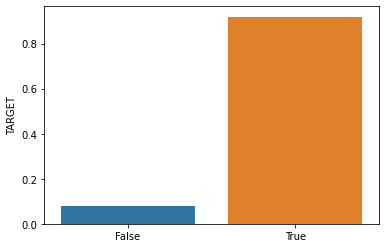

In [55]:
sns.barplot(x = [True,False],y = y.value_counts(normalize=True))

# Anova (Feature Selection)

In [56]:
X.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
  

In [57]:
feats = X.columns

In [58]:
train.isna().sum().sample(10)

LIVINGAREA_AVG                0
OBS_30_CNT_SOCIAL_CIRCLE      0
NAME_HOUSING_TYPE             0
TOTALAREA_MODE                0
EXT_SOURCE_1                  0
AMT_REQ_CREDIT_BUREAU_WEEK    0
NAME_EDUCATION_TYPE           0
AMT_REQ_CREDIT_BUREAU_QRT     0
ENTRANCES_AVG                 0
FLAG_DOCUMENT_21              0
dtype: int64

In [59]:
from sklearn.feature_selection import f_classif
anova = pd.DataFrame(f_classif(X,y)).transpose()

In [60]:
anova.columns = ['f-score','p-value']

In [61]:
anova['columns_name'] = feats

In [62]:
# urutan feature penting bisa dilihat dari nilai f-score terbesar ke terkecil
anova.sort_values('f-score',ascending=False).head(30)

f-score  p-value                 columns_name
36  8110.51     0.00                 EXT_SOURCE_2
37  7811.66     0.00                 EXT_SOURCE_3
35  3053.20     0.00                 EXT_SOURCE_1
13  1893.98     0.00                   DAYS_BIRTH
25  1144.46     0.00  REGION_RATING_CLIENT_W_CITY
24  1070.49     0.00         REGION_RATING_CLIENT
71   940.49     0.00       DAYS_LAST_PHONE_CHANGE
9    922.81     0.00          NAME_EDUCATION_TYPE
1    922.59     0.00                  CODE_GENDER
16   816.40     0.00              DAYS_ID_PUBLISH
32   801.74     0.00       REG_CITY_NOT_WORK_CITY
14   682.12     0.00                DAYS_EMPLOYED
8    675.85     0.00             NAME_INCOME_TYPE
18   651.56     0.00               FLAG_EMP_PHONE
31   607.28     0.00       REG_CITY_NOT_LIVE_CITY
73   605.94     0.00              FLAG_DOCUMENT_3
15   542.75     0.00            DAYS_REGISTRATION
43   477.75     0.00                FLOORSMAX_AVG
61   472.22     0.00               FLOORSMAX_MEDI
52   453.57     0.00               FLOORSMAX_MODE
12   426.76     0.00   REGION_POPULATION_RELATIVE
41   395.79     0.00                ELEVATORS_AVG
59   389.16     0.00               ELEVATORS_MEDI
11   366.21     0.00            NAME_HOUSING_TYPE
50   360.52     0.00               ELEVATORS_MODE
33   325.52     0.00      LIVE_CITY_NOT_WORK_CITY
70   303.50     0.00     DEF_60_CNT_SOCIAL_CIRCLE
0    293.82     0.00           NAME_CONTRACT_TYPE
34   291.34     0.00            ORGANIZATION_TYPE
6    283.88     0.00                   AMT_CREDIT

In [63]:
# Chosen Features (30 highest f-score)
chosen_feats = ['EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
               'DAYS_LAST_PHONE_CHANGE','NAME_EDUCATION_TYPE','CODE_GENDER','REG_CITY_NOT_WORK_CITY','DAYS_EMPLOYED',
               'NAME_INCOME_TYPE','FLAG_EMP_PHONE','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','DAYS_REGISTRATION',
               'FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','REGION_POPULATION_RELATIVE','ELEVATORS_AVG',
               'ELEVATORS_MEDI','NAME_HOUSING_TYPE','ELEVATORS_MODE','LIVE_CITY_NOT_WORK_CITY','DEF_60_CNT_SOCIAL_CIRCLE',
               'NAME_CONTRACT_TYPE','ORGANIZATION_TYPE','AMT_CREDIT','TOTALAREA_MODE']

In [64]:
X = pd.DataFrame(train,columns=chosen_feats)

In [65]:
X

EXT_SOURCE_2  EXT_SOURCE_3  EXT_SOURCE_1  DAYS_BIRTH  \
0               0.26          0.14          0.08        9461   
1               0.62          0.51          0.31       16765   
2               0.56          0.73          0.50       19046   
3               0.65          0.51          0.50       19005   
4               0.32          0.51          0.50       19932   
...              ...           ...           ...         ...   
307506          0.68          0.51          0.15        9327   
307507          0.12          0.51          0.50       20775   
307508          0.54          0.22          0.74       14966   
307509          0.51          0.66          0.50       11961   
307510          0.71          0.11          0.73       16856   

        REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT  \
0                                 2                     2   
1                                 1                     1   
2                                 2                     2   
3                                 2                     2   
4                                 2                     2   
...                             ...                   ...   
307506                            1                     1   
307507                            2                     2   
307508                            3                     3   
307509                            2                     2   
307510                            1                     1   

        DAYS_LAST_PHONE_CHANGE  NAME_EDUCATION_TYPE  CODE_GENDER  \
0                      1134.00                    4            1   
1                       828.00                    1            0   
2                       815.00                    4            1   
3                       617.00                    4            0   
4                      1106.00                    4            1   
...                        ...                  ...          ...   
307506                  273.00                    4            1   
307507                    0.00                    4            0   
307508                 1909.00                    1            0   
307509                  322.00                    4            0   
307510                  787.00                    1            0   

        REG_CITY_NOT_WORK_CITY  ...  ELEVATORS_AVG  ELEVATORS_MEDI  \
0                            0  ...           0.00            0.00   
1                            0  ...           0.08            0.08   
2                            0  ...           0.00            0.00   
3                            0  ...           0.00            0.00   
4                            1  ...           0.00            0.00   
...                        ...  ...            ...             ...   
307506                       0  ...           0.22            0.22   
307507                       0  ...           0.00            0.00   
307508                       1  ...           0.00            0.00   
307509                       1  ...           0.00            0.00   
307510                       1  ...           0.08            0.08   

        NAME_HOUSING_TYPE  ELEVATORS_MODE  LIVE_CITY_NOT_WORK_CITY  \
0                       1            0.00                        0   
1                       1            0.08                        0   
2                       1            0.00                        0   
3                       1            0.00                        0   
4                       1            0.00                        1   
...                   ...             ...                      ...   
307506                  5            0.08                        0   
307507                  1            0.00                        0   
307508                  1            0.00                        1   
307509                  1            0.00                        0   
307510                  1            0.08                        1   

       

# Model Accuration

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)
X_transform

array([[0.30754227, 0.15505445, 0.07221502, ..., 0.0877193 , 0.09028652,
        0.0149    ],
       [0.72777309, 0.56988915, 0.31293267, ..., 0.68421053, 0.31173596,
        0.0714    ],
       [0.65018979, 0.81413048, 0.51423795, ..., 0.19298246, 0.02247191,
        0.0688    ],
       ...,
       [0.62657536, 0.24381478, 0.76936959, ..., 0.68421053, 0.15796854,
        0.797     ],
       [0.60136022, 0.7375872 , 0.51423795, ..., 0.05263158, 0.08117528,
        0.0086    ],
       [0.82873586, 0.12663023, 0.75927943, ..., 0.0877193 , 0.15730337,
        0.0718    ]])

In [67]:
def model_accuration(model,X_test,y_test):
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)

# Train Test Split

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 123)

In [69]:
y_train.value_counts()

0    197880
1     17377
Name: TARGET, dtype: int64

# Under Sampling

In [70]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(random_state=123)

In [71]:
X_under, y_under = undersampling.fit_resample(X_train, y_train)

In [72]:
X_under = pd.DataFrame(X_under, columns=X.columns)

In [73]:
y_under = pd.DataFrame(y_under)

In [74]:
y_under.value_counts()

TARGET
1         17377
0         17377
dtype: int64

In [75]:
y_under.value_counts(normalize=True)

TARGET
1        0.50
0        0.50
dtype: float64

<AxesSubplot:>

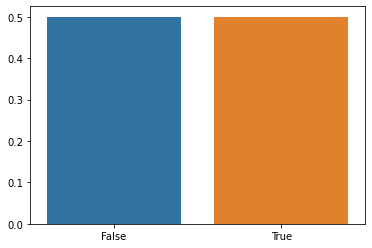

In [76]:
sns.barplot(x=[True,False], y=y_under.value_counts(normalize=True))

# Min Max Scaler

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X_under)
X_transform = pd.DataFrame(X_transform,columns = X.columns)

In [78]:
X_transform

EXT_SOURCE_2  EXT_SOURCE_3  EXT_SOURCE_1  DAYS_BIRTH  \
0              0.89          0.80          0.56        0.27   
1              0.39          0.27          0.27        0.13   
2              0.92          0.59          0.51        0.63   
3              0.35          0.78          0.66        0.63   
4              0.38          0.61          0.54        0.30   
...             ...           ...           ...         ...   
34749          0.77          0.27          0.38        0.54   
34750          0.83          0.57          0.51        0.62   
34751          0.18          0.16          0.51        0.43   
34752          0.58          0.32          0.51        0.27   
34753          0.29          0.00          0.51        0.39   

       REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT  \
0                             0.00                  0.00   
1                             0.50                  1.00   
2                             0.00                  0.00   
3                             0.50                  0.50   
4                             0.50                  0.50   
...                            ...                   ...   
34749                         0.00                  0.00   
34750                         1.00                  1.00   
34751                         0.50                  0.50   
34752                         1.00                  1.00   
34753                         0.50                  0.50   

       DAYS_LAST_PHONE_CHANGE  NAME_EDUCATION_TYPE  CODE_GENDER  \
0                        0.12                 1.00         0.00   
1                        0.29                 1.00         0.00   
2                        0.11                 1.00         0.00   
3                        0.40                 1.00         0.00   
4                        0.03                 1.00         0.00   
...                       ...                  ...          ...   
34749                    0.50                 0.25         0.00   
34750                    0.00                 1.00         0.50   
34751                    0.00                 1.00         0.50   
34752                    0.05                 0.50         0.00   
34753                    0.06                 1.00         0.00   

       REG_CITY_NOT_WORK_CITY  ...  ELEVATORS_AVG  ELEVATORS_MEDI  \
0                        0.00  ...           0.00            0.00   
1                        0.00  ...           0.16            0.16   
2                        1.00  ...           0.00            0.00   
3                        0.00  ...           0.00            0.00   
4                        0.00  ...           0.00            0.00   
...                       ...  ...            ...             ...   
34749                    1.00  ...           0.80            0.80   
34750                    0.00  ...           0.00            0.00   
34751                    0.00  ...           0.00            0.00   
34752                    0.00  ...           0.00            0.00   
34753                    0.00  ...           0.00            0.00   

       NAME_HOUSING_TYPE  ELEVATORS_MODE  LIVE_CITY_NOT_WORK_CITY  \
0                   0.20            0.00                     0.00   
1                   1.00            0.16                     0.00   
2                   0.20            0.00                     1.00   
3                   0.20            0.00                     0.00   
4                   0.20            0.00                     0.00   
...                  ...             ...                      ...   
34749               0.20            0.81                     1.00   
34750               0.20            0.00                     0.00   
34751               0.20            0.00                     0.00   
34752               0.20            0.00                     0.00   
34753               0.20            0.00                     0.00   

       DEF_60_CNT_SOCIAL_CIRCLE  NAME_CONTRACT_TYPE  ORGANIZATION_

## Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_transform,y_under)

/Users/joicemargaretha/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/joicemargaretha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [81]:
model_accuration(logreg,X_test,y_test)

0.9192663732737876

# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
model_accuration(dtc,X_test,y_test)

0.8503045938387496

# Model Validation

In [83]:
from sklearn import model_selection

In [84]:
# Model decision tree
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=123)
model = DecisionTreeClassifier()
results = model_selection.cross_val_score(model, X, y, cv=kfold,scoring='roc_auc')
print("ROC AUC: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

ROC AUC: 53.910% (0.261%)


In [85]:
# Model logistic regression
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=123)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, y, cv=kfold,scoring='roc_auc')
print("ROC AUC: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

ROC AUC: 59.934% (0.444%)


# GridSearchCV

In [86]:
params = {'max_depth':[3,5,7,9,11,'max']} # hati-hati pemilihan hyperparameter jangan terlalu banyak kombinasinya

In [87]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=dtc,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [88]:
grid.fit(X_train,y_train)

/Users/joicemargaretha/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning:

One or more of the test scores are non-finite: [0.91927324 0.9192082  0.91871576 0.91735924 0.91504108        nan]



GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 'max']},
             scoring='accuracy')

In [89]:
model_accuration(grid,X_test,y_test)

0.9192663732737876

In [90]:
grid.best_score_

0.9192732412403961

In [91]:
grid.best_params_

{'max_depth': 3}